In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

In [2]:
# create synthetic data
column = np.linspace(0,1,20)
column2 = np.linspace(0,2,40)
labels = ['female','male']
data = np.array(np.meshgrid(column, column2, column2, labels)).T.reshape(-1,4)
df_syn = pd.DataFrame({'question.adj_accuracy': pd.Series(data[:,0], dtype='float'),
                       'question.s_adj_accuracy': pd.Series(data[:,1], dtype='float'),
                       'question.cv': pd.Series(data[:,2], dtype='float'),
                       'question.majLabel': pd.Series(data[:,3], dtype='str'),})
data = np.array(np.meshgrid(column, column2, labels)).T.reshape(-1,3)
df_syn_ran = pd.DataFrame({'question.ordering_utility': pd.Series(data[:,0], dtype='float'),
                           'question.new_rND': pd.Series(data[:,1], dtype='float'),
                           'question.majLabel': pd.Series(data[:,2], dtype='str'),})
df_syn_ran.head()

,question.ordering_utility,question.new_rND,question.majLabel
0,0.0,0.000000,female
1,0.0,0.051282,female
2,0.0,0.102564,female
3,0.0,0.153846,female
4,0.0,0.205128,female


In [3]:
# read actual data
df = pd.read_csv('allTogether.csv')

def myround(x, base=1, dec=1):
    return round(base * round(x/base),dec)

# remove ids and numbers
df = df.drop(['_id','question.number','user._id'], axis=1)
# groupNames, majLabel and colors are synonyms
df = df.drop(['question.groupNames','question.colors'], axis=1)

# rND is labeled in reverse
df['question.new_rND'] = 2 - df['question.new_rND']

# add absolute version of the cv score (demographic parity)
df['question.abs_cv'] = df['question.cv']
df.loc[df['question.cv']>1, 'question.abs_cv'] = 2-df['question.cv']
df_syn['question.abs_cv'] = df_syn['question.cv']
df_syn.loc[df_syn['question.cv']>1, 'question.abs_cv'] = 2-df_syn['question.cv']

# add absolute version of the rND score (demographic parity)
df['question.abs_rND'] = df['question.new_rND']
df.loc[df['question.new_rND']>1, 'question.abs_rND'] = 2-df['question.new_rND']
df_syn_ran['question.abs_rND'] = df_syn_ran['question.new_rND']
df_syn_ran.loc[df_syn_ran['question.new_rND']>1, 'question.abs_rND'] = 2-df_syn_ran['question.new_rND']

# add gender-focused version of the cv score (demographic parity)
# S=1 for male personas, S=0 for female personas
df['question.gender_cv'] = df['question.cv']
df.loc[df['question.majLabel']=='female', 'question.gender_cv'] = 2-df['question.cv']
df_syn['question.gender_cv'] = df_syn['question.cv']
df_syn.loc[df_syn['question.majLabel']=='female', 'question.gender_cv'] = 2-df_syn['question.cv']
# S=0 for female personas, S=1 for male personas
df['question.inverse_gender_cv'] = df['question.cv']
df.loc[df['question.majLabel']=='male', 'question.inverse_gender_cv'] = 2-df['question.cv']
df_syn['question.inverse_gender_cv'] = df_syn['question.cv']
df_syn.loc[df_syn['question.majLabel']=='male', 'question.inverse_gender_cv'] = 2-df_syn['question.cv']

# add gender-focused version of the rND score (demographic parity)
# S=1 for male personas, S=0 for female personas
df['question.gender_rND'] = df['question.new_rND']
df.loc[df['question.majLabel']=='female', 'question.gender_rND'] = 2-df['question.new_rND']
df_syn_ran['question.gender_rND'] = df_syn_ran['question.new_rND']
df_syn_ran.loc[df_syn_ran['question.majLabel']=='female', 'question.gender_rND'] = 2-df_syn_ran['question.new_rND']
# S=0 for female personas, S=1 for male personas
df['question.inverse_gender_rND'] = df['question.new_rND']
df.loc[df['question.majLabel']=='male', 'question.inverse_gender_rND'] = 2-df['question.new_rND']
df_syn_ran['question.inverse_gender_rND'] = df['question.new_rND']
df_syn_ran.loc[df_syn_ran['question.majLabel']=='male', 'question.inverse_gender_rND'] = \
    2-df_syn_ran['question.new_rND']

# categorial gender-based cv
df['question.cat_gender_cv'] = myround(df['question.cv'], .2)
df.loc[df['question.majLabel']=='female', 'question.cat_gender_cv'] = myround(2-df['question.cv'], .2)
df_syn['question.cat_gender_cv'] = myround(df_syn['question.cv'], .2)
df_syn.loc[df_syn['question.majLabel']=='female', 'question.cat_gender_cv'] = myround(2-df_syn['question.cv'], .2)
# categorial inversed gender-based cv
df['question.cat_inverse_gender_cv'] = myround(df['question.cv'], .2)
df.loc[df['question.majLabel']=='male', 'question.cat_inverse_gender_cv'] = myround(2-df['question.cv'], .2)
df_syn['question.cat_inverse_gender_cv'] = myround(df_syn['question.cv'], .2)
df_syn.loc[df_syn['question.majLabel']=='male', 'question.cat_inverse_gender_cv'] = \
    myround(2-df_syn['question.cv'], .2)

# categorial gender-based rND
df['question.cat_gender_rND'] = myround(df['question.new_rND'], .2)
df.loc[df['question.majLabel']=='female', 'question.cat_gender_rND'] = myround(2-df['question.new_rND'], .2)
df_syn_ran['question.cat_gender_rND'] = myround(df_syn_ran['question.new_rND'], .2)
df_syn_ran.loc[df_syn_ran['question.majLabel']=='female', 'question.cat_gender_rND'] = \
    myround(2-df_syn_ran['question.new_rND'], .2)
# categorial inversed gender-based rND
df['question.cat_inverse_gender_rND'] = myround(df['question.new_rND'], .2)
df.loc[df['question.majLabel']=='male', 'question.cat_inverse_gender_rND'] = myround(2-df['question.new_rND'], .2)
df_syn_ran['question.cat_inverse_gender_rND'] = myround(df_syn_ran['question.new_rND'], .2)
df_syn_ran.loc[df_syn_ran['question.majLabel']=='male', 'question.cat_inverse_gender_rND'] = \
    myround(2-df_syn_ran['question.new_rND'], .2)

# categorial adj_accuracy
df['question.cat_adj_accuracy'] = myround(df['question.adj_accuracy'], .2)
df_syn['question.cat_adj_accuracy'] = myround(df_syn['question.adj_accuracy'], .2)
# categotial ordering_utility
df['question.cat_ordering_utility'] = myround(df['question.ordering_utility'], .2)
df_syn_ran['question.cat_ordering_utility'] = myround(df_syn_ran['question.ordering_utility'], .2)

pd.set_option('display.max_columns', None)
df.head()

,rating,inconfidence,secondsElapsed,question.questionType,question.minSize,question.majSize,question.majLabel,question.tpr,question.tnr,question.bcr,question.accuracy,question.adj_tpr,question.adj_tnr,question.adj_bcr,question.adj_accuracy,question.tpr0,question.tnr0,question.bcr0,question.accuracy0,question.adj_tpr0,question.adj_tnr0,question.adj_bcr0,question.adj_accuracy0,question.tpr1,question.tnr1,question.bcr1,question.accuracy1,question.adj_tpr1,question.adj_tnr1,question.adj_bcr1,question.adj_accuracy1,question.s_tpr,question.s_tnr,question.s_bcr,question.s_accuracy,question.s_adj_tpr,question.s_adj_tnr,question.s_adj_bcr,question.s_adj_accuracy,question.cv,question.cluster,question.ordering_utility,question.sum_of_diff,question.rND,question.new_rND,user.language,user.accuracy,user.age,user.believe,user.comparativeAccuracy,user.confidence,user.edu,user.fear,user.gender,user.genderParity,user.political,user.religious,user.screenHeight,user.screenWidth,user.will,user.agreeableness,user.conscientiousness,user.extraversion,user.neuroticism,user.openness,question.abs_cv,question.abs_rND,question.gender_cv,question.inverse_gender_cv,question.gender_rND,question.inverse_gender_rND,question.cat_gender_cv,question.cat_inverse_gender_cv,question.cat_gender_rND,question.cat_inverse_gender_rND,question.cat_adj_accuracy,question.cat_ordering_utility
0,0.89,0.84,36.534,selection,3,7,female,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.00,1.000000,NaN,NaN,1.000000,1.0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.714286,3,NaN,NaN,NaN,NaN,de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.285714,NaN,0.285714,1.714286,NaN,NaN,0.2,1.8,NaN,NaN,1.0,NaN
1,0.58,NaN,16.849,selection,5,5,female,0.833333,0.750000,0.791667,0.8,0.927083,0.833333,0.880208,0.898551,0.666667,1.000000,0.833333,0.80,0.854167,1.000000,0.927083,0.898551,1.0,0.5,0.75,0.800000,1.000000,0.666667,0.833333,0.898551,0.666667,1.500000,1.083333,1.000000,0.854167,1.333333,1.093750,1.000000,0.600000,8,NaN,NaN,NaN,NaN,de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.600000,NaN,1.400000,0.600000,NaN,NaN,1.4,0.6,NaN,NaN,0.8,NaN
2,0.39,0.06,12.849,selection,4,6,male,0.666667,0.857143,0.761905,0.8,0.774194,0.885246,0.829720,0.862745,1.000000,0.666667,0.833333,0.75,1.000000,0.791045,0.895522,0.827160,0.5,1.0,0.75,0.833333,0.730769,1.000000,0.865385,0.921348,1.500000,0.666667,1.083333,0.916667,1.269231,0.791045,1.030138,0.905812,1.333333,7,NaN,NaN,NaN,NaN,de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.666667,NaN,1.333333,0.666667,NaN,NaN,1.4,0.6,NaN,NaN,0.8,NaN
3,0.25,NaN,10.424,selection,4,6,female,0.500000,0.666667,0.583333,0.6,0.565217,0.813725,0.689471,0.736486,0.333333,1.000000,0.666667,0.50,0.395349,1.000000,0.697674,0.500000,1.0,0.6,0.80,0.666667,1.000000,0.747967,0.873984,0.770370,0.333333,1.400000,0.866667,0.833333,0.395349,1.252033,0.823691,0.729630,0.750000,2,NaN,NaN,NaN,NaN,de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.750000,NaN,1.250000,0.750000,NaN,NaN,1.2,0.8,NaN,NaN,0.8,NaN
4,0.05,0.13,8.199,selection,1,9,female,0.000000,0.888889,0.444444,0.8,0.000000,0.857143,0.428571,0.825911,NaN,0.000000,NaN,0.00,NaN,0.000000,NaN,0.000000,0.0,1.0,0.50,0.888889,0.000000,1.000000,0.500000,0.957746,NaN,0.000000,NaN,0.111111,NaN,0.000000,NaN,0.042254,2.000000,0,NaN,NaN,NaN,NaN,de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.000000,NaN,0.000000,2.000000,NaN,NaN,0.0,2.0,NaN,NaN,0.8,NaN


In [4]:
cat_cols = ['question.majLabel','user.gender']
num_cols = []
num_cols_sel = [
    'question.adj_accuracy',
    'question.s_adj_accuracy',
    'question.cv',
    'question.abs_cv',
    'question.gender_cv',
    'question.cat_gender_cv',
    'question.cat_inverse_gender_cv',
    'question.cat_adj_accuracy'
]
num_cols_ran = [
    'question.ordering_utility',
    'question.sum_of_diff',
    'question.new_rND',
    'question.abs_rND',
    'question.cat_gender_rND',
    'question.cat_inverse_gender_rND',
    'question.cat_ordering_utility',
    'question.gender_rND'
]

# split dataset according to questionType
df_ran = df.query("`question.questionType` == 'ranking'")[
    ['rating'] + num_cols + num_cols_ran + cat_cols]
df_sel = df.query("`question.questionType` == 'selection'")[
    ['rating'] + num_cols + num_cols_sel + cat_cols]
df_sel.head()

,rating,question.adj_accuracy,question.s_adj_accuracy,question.cv,question.abs_cv,question.gender_cv,question.cat_gender_cv,question.cat_inverse_gender_cv,question.cat_adj_accuracy,question.majLabel,user.gender
0,0.89,1.000000,1.000000,1.714286,0.285714,0.285714,0.2,1.8,1.0,female,male
1,0.58,0.898551,1.000000,0.600000,0.600000,1.400000,1.4,0.6,0.8,female,male
2,0.39,0.862745,0.905812,1.333333,0.666667,1.333333,1.4,0.6,0.8,male,male
3,0.25,0.736486,0.729630,0.750000,0.750000,1.250000,1.2,0.8,0.8,female,male
4,0.05,0.825911,0.042254,2.000000,0.000000,0.000000,0.0,2.0,0.8,female,male


In [5]:
def print_discrete_heatmap(data, x, y, z='rating', width=None, height=None,
                           xlabel=None, ylabel=None, title=None, detail=10):

    # find width and height if undefined
    if (not width):
        width = round(np.max(data[x])-np.min(data[x]))
    if (not height):
        height = round(np.max(data[y])-np.min(data[y]))
        
    
    # prepare matrices
    x_values = data[x].reset_index(drop = True)
    y_values = data[y].reset_index(drop = True)
    z_pre_values = data[z].reset_index(drop = True)
    z_values = np.full((height*detail, width*detail), np.nan)
    z_sum = np.full((height*detail, width*detail), np.nan)
    z_mean = np.full((height*detail, width*detail), np.nan)
    
    # sums of ratings
    for i in range(len(x_values)):
        col = int(np.round(y_values[i]*detail))
        row = int(np.round(x_values[i]*detail))
        if (row == width*detail):
            row = width*detail - 1
        if (col == height*detail):
            col = height*detail -1
        if (np.isnan(z_sum[col,row])):
            z_values[col,row] = z_pre_values[i]
            z_sum[col,row] = 1
        else:
            z_values[col,row] += z_pre_values[i]
            z_sum[col,row] += 1

    # mean ratings if not np.nan
    for i in range(z_sum.shape[0]):
        for j in range(z_sum.shape[1]):
            if (not np.isnan(z_values[i,j]) and not np.isnan(z_sum[i,j])):
                z_mean[i,j] = z_values[i,j] / z_sum[i,j]

    # plotting
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_aspect('equal')
    y_grid, x_grid = np.mgrid[slice(0, height+1/detail, 1/detail), slice(0, width+1/detail, 1/detail)]
    m = ax.pcolor(x_grid, y_grid, z_mean, cmap=plt.cm.RdYlBu, vmin=0, vmax=1)
    cb = fig.colorbar(m, shrink=.5, ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    cb.set_label('fairness rating')
    if(xlabel):
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(x)
    if(ylabel):
        ax.set_ylabel(ylabel)
    else:
        ax.set_ylabel(y)
    if(title):
        ax.set_title(title)
    plt.show()

    
def print_pointplots(df1, df2, gender_filter=None, group_name='User'):
    sns.set_style("whitegrid")

    if (gender_filter is None):
        df2_male = df2.copy()
    else:
        df2_male = df2[df2['user.gender'] == gender_filter].copy()
    df1_male = df1.copy()
    df1_male['cv'] = df1['question.cat_gender_cv']
    df2_male['cv'] = df2['question.cat_gender_cv']
    df1_male['priviledged group'] = 'male personas'
    df2_male['priviledged group'] = 'male personas'
    if (gender_filter is None):
        df2_female = df2.copy()
    else:
        df2_female = df2[df2['user.gender'] == gender_filter].copy()
    df1_female = df1.copy()
    df1_female['cv'] = df1['question.cat_inverse_gender_cv']
    df2_female['cv'] = df2['question.cat_inverse_gender_cv']
    df1_female['priviledged group'] = 'female personas'
    df2_female['priviledged group'] = 'female personas'

    cyan = sns.color_palette()[9]
    red = sns.color_palette()[3]

    fig,axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)
    fig.subplots_adjust(wspace=0.08)
    ax = axs[0]
    g = sns.pointplot(data=pd.concat([df1_male, df1_female]), ax=ax, hue='priviledged group', dodge=.1, ci=0,
                      x='cv', y='modeled rating', join=False, palette=[red, cyan], markers=['x','o'],
                      hue_order=['female personas', 'male personas'])
    ax.set(xlim=(-0.5, 5.5), ylim=(0,0.79))
    g.legend_.remove()
    ax.set_ylabel('rating')
    g.set_title('Modeled ratings, synthetical scenarios')
    g.set(xlabel = 'gender parity (binned cv)')
    ax = axs[1]
    g = sns.pointplot(data=pd.concat([df2_male, df2_female]), ax=ax, hue='priviledged group', dodge=.1, ci=90,
                      x='cv', y='modeled rating', join=False, palette=[red, cyan], markers=['x','o'],
                      hue_order=['female personas', 'male personas'])
    ax.set(xlim=(-0.5, 5.5), ylim=(0,0.79))
    ax.set_ylabel('')
    g.legend_.remove()
    g.set_title('Modeled ratings, actual scenarios')
    g.set(xlabel = 'gender parity (binned cv)')
    ax2 = axs[2]
    g = sns.pointplot(data=pd.concat([df2_male, df2_female]), ax=ax2, hue='priviledged group', dodge=.1, ci=90,
                      x='cv', y='rating', join=False, palette=[red, cyan], markers=['x','o'],
                      hue_order=['female personas', 'male personas'])
    ax2.set(xlim=(-0.5, 5.5), ylim=(0,0.79))
    ax2.set_ylabel('')
    ax2.legend(bbox_to_anchor=(1.1,0.5), loc="center left", title='priviledged group', frameon=False)
    g.set_title(group_name + '\'s ratings, actual scenarios')
    g.set(xlabel = 'gender parity (binned cv)')
    sns.despine(left=True)
    
def print_pointplots_ran(df1, df2, gender_filter=None, group_name='User'):
    sns.set_style("whitegrid")

    if (gender_filter is None):
        df2_male = df2.copy()
    else:
        df2_male = df2[df2['user.gender'] == gender_filter].copy()
    df1_male = df1.copy()
    df1_male['rND'] = df1['question.cat_gender_rND']
    df2_male['rND'] = df2['question.cat_gender_rND']
    df1_male['priviledged group'] = 'male personas'
    df2_male['priviledged group'] = 'male personas'
    if (gender_filter is None):
        df2_female = df2.copy()
    else:
        df2_female = df2[df2['user.gender'] == gender_filter].copy()
    df1_female = df1.copy()
    df1_female['rND'] = df1['question.cat_inverse_gender_rND']
    df2_female['rND'] = df2['question.cat_inverse_gender_rND']
    df1_female['priviledged group'] = 'female personas'
    df2_female['priviledged group'] = 'female personas'

    cyan = sns.color_palette()[9]
    red = sns.color_palette()[3]

    fig,axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)
    fig.subplots_adjust(wspace=0.08)
    ax = axs[0]
    g = sns.pointplot(data=pd.concat([df1_male, df1_female]), ax=ax, hue='priviledged group', dodge=.1, ci=0,
                      x='rND', y='modeled rating', join=False, palette=[red, cyan], markers=['x','o'],
                      hue_order=['female personas', 'male personas'])
    ax.set(xlim=(-0.5, 5.5), ylim=(0,0.79))
    g.legend_.remove()
    ax.set_ylabel('rating')
    g.set_title('Modeled ratings, synthetical scenarios')
    g.set(xlabel = 'gender parity (binned rND)')
    ax = axs[1]
    g = sns.pointplot(data=pd.concat([df2_male, df2_female]), ax=ax, hue='priviledged group', dodge=.1, ci=90,
                      x='rND', y='modeled rating', join=False, palette=[red, cyan], markers=['x','o'],
                      hue_order=['female personas', 'male personas'])
    ax.set(xlim=(-0.5, 5.5), ylim=(0,0.79))
    ax.set_ylabel('')
    g.legend_.remove()
    g.set_title('Modeled ratings, actual scenarios')
    g.set(xlabel = 'gender parity (binned rND)')
    ax2 = axs[2]
    g = sns.pointplot(data=pd.concat([df2_male, df2_female]), ax=ax2, hue='priviledged group', dodge=.1, ci=90,
                      x='rND', y='rating', join=False, palette=[red, cyan], markers=['x','o'],
                      hue_order=['female personas', 'male personas'])
    ax2.set(xlim=(-0.5, 5.5), ylim=(0,0.79))
    ax2.set_ylabel('')
    ax2.legend(bbox_to_anchor=(1.1,0.5), loc="center left", title='priviledged group', frameon=False)
    g.set_title(group_name + '\'s ratings, actual scenarios')
    g.set(xlabel = 'gender parity (binned rND)')
    sns.despine(left=True)
    
def theoretical_pointplots(df1):
    sns.set_style("whitegrid")

    df1_male = df1.copy()
    df1_male['cv'] = df1['question.cat_gender_cv']
    df1_male['priviledged group'] = 'male personas'
    df1_female = df1.copy()
    df1_female['cv'] = df1['question.cat_inverse_gender_cv']
    df1_female['priviledged group'] = 'female personas'

    cyan = sns.color_palette()[9]
    red = sns.color_palette()[3]

    fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)
    fig.subplots_adjust(wspace=0.08)
    ax = axs[0]
    g = sns.pointplot(data=pd.concat([df1_male, df1_female]), ax=ax, hue='priviledged group', dodge=.1, ci=0,
                      x='question.cat_adj_accuracy', y='modeled rating', join=False, palette=[red, cyan],
                      markers=['x','o'], hue_order=['female personas', 'male personas'])
    ax.set(xlim=(-0.5, 5.5), ylim=(0,0.95))
    g.legend_.remove()
    g.set(xlabel = 'accuracy (binned)')
    ax = axs[1]
    g = sns.pointplot(data=pd.concat([df1_male, df1_female]), ax=ax, hue='priviledged group', dodge=.1, ci=0,
                      x='cv', y='modeled rating', join=False, palette=[red, cyan], markers=['x','o'],
                      hue_order=['female personas', 'male personas'])
    ax.set(xlim=(-0.5, 5.5), ylim=(0,0.95))
    ax.set_ylabel('')
    ax.legend(bbox_to_anchor=(1.1,0.5), loc="center left", title='priviledged group', frameon=False)
    g.set(xlabel = 'gender parity (binned cv)')
    sns.despine(left=True)

In [6]:
def model_sel_ratings(df,
                      abs_cv = 0,
                      adj_accuracy = 1,
                      s_adj_accuracy = 0,
                      minority_prop_boost = 0,
                      minority_boost = 0,
                      female_prop_boost = 0,
                      female_boost = 0,
                      overall_discount = 0):
    
    # add the modeled ratings
    df['modeled rating'] = df['question.adj_accuracy'] * adj_accuracy \
                               + df['question.s_adj_accuracy'] * s_adj_accuracy \
                               + df['question.abs_cv'] * abs_cv \
    # add boost to unpriviledged groups
    df.loc[df['question.cv'] >= 1, 'modeled rating'] = \
        df['modeled rating'] + df['question.cv'] * minority_prop_boost + minority_boost
    df.loc[df['question.gender_cv'] >= 1, 'modeled rating'] = \
        df['modeled rating'] + df['question.gender_cv'] * female_prop_boost + female_boost
    # normalize the modeled ratings
    minimum = np.min(df['modeled rating'])
    maximum = np.max(df['modeled rating'])
    df['modeled rating'] = (df['modeled rating'] - minimum) / (maximum - minimum) - overall_discount
    df.loc[df['modeled rating'] < 0, 'modeled rating'] = 0

    return df

# Theoretical Models

### Focus on gender parity, benefit female personas

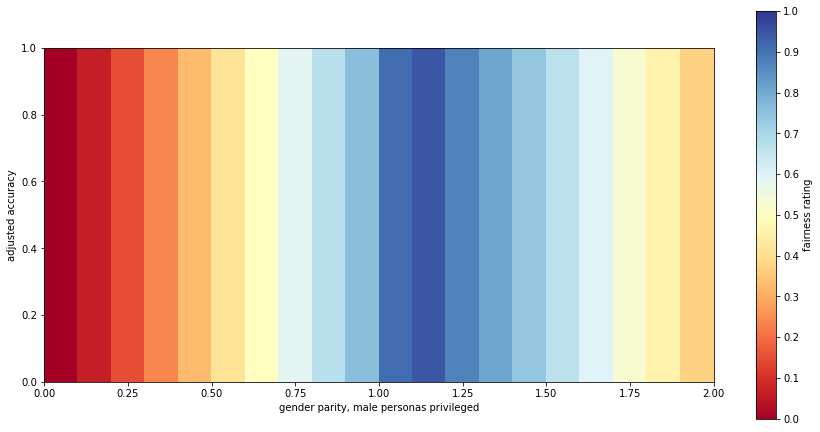

In [7]:
model_sel_ratings(df_syn,
                  abs_cv = 1,
                  adj_accuracy = 0,
                  female_prop_boost = 0.2,
                  overall_discount = 0)
print_discrete_heatmap(data=df_syn, x='question.gender_cv', y='question.adj_accuracy', z='modeled rating',
                       xlabel="gender parity, male personas privileged",
                       ylabel="adjusted accuracy",)

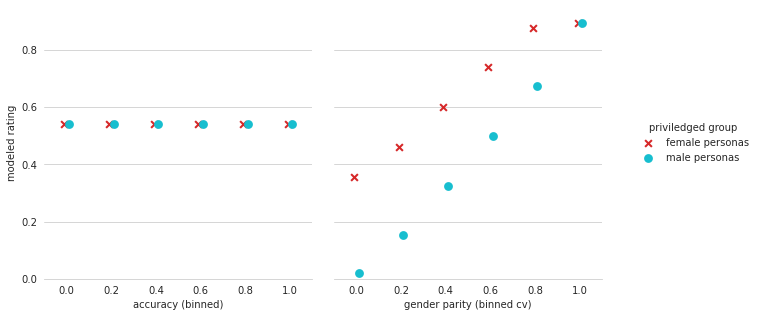

In [8]:
theoretical_pointplots(df_syn)

### Focus on accuracy, pesimistic

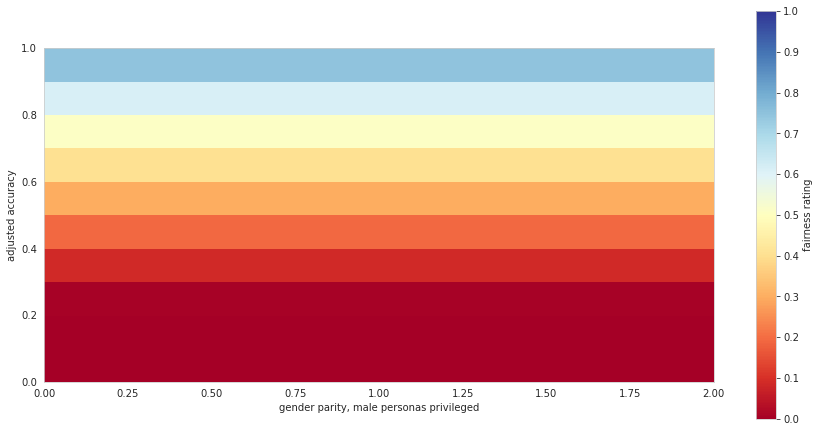

In [9]:
model_sel_ratings(df_syn,
                  abs_cv = 0,
                  adj_accuracy = 1,
                  female_prop_boost = 0,
                  overall_discount = 0.2)
print_discrete_heatmap(data=df_syn, x='question.gender_cv', y='question.adj_accuracy', z='modeled rating',
                       xlabel="gender parity, male personas privileged",
                       ylabel="adjusted accuracy",)

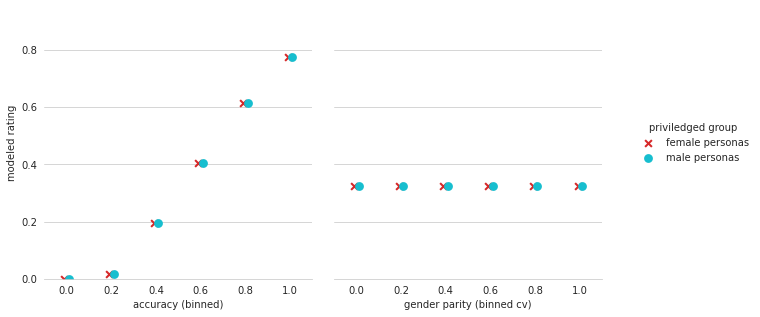

In [10]:
theoretical_pointplots(df_syn)

### Equal focus on accuracy and gender parity, optimistic

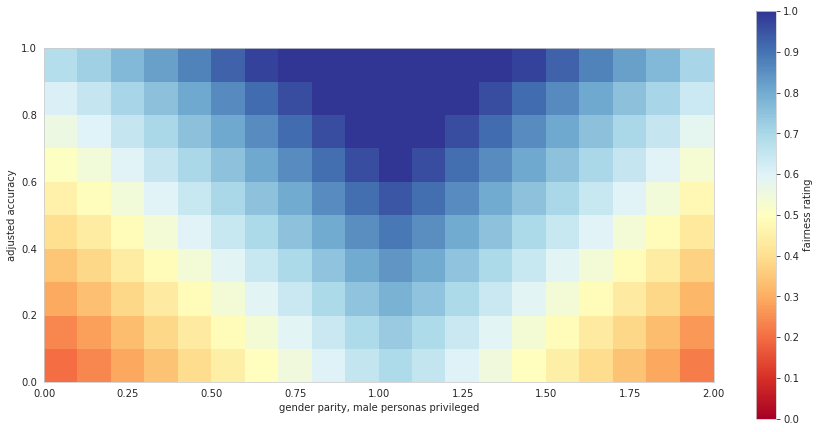

In [11]:
model_sel_ratings(df_syn,
                  abs_cv = 1,
                  adj_accuracy = 1,
                  female_prop_boost = 0,
                  overall_discount = -0.2)
print_discrete_heatmap(data=df_syn, x='question.gender_cv', y='question.adj_accuracy', z='modeled rating',
                       xlabel="gender parity, male personas privileged",
                       ylabel="adjusted accuracy",)

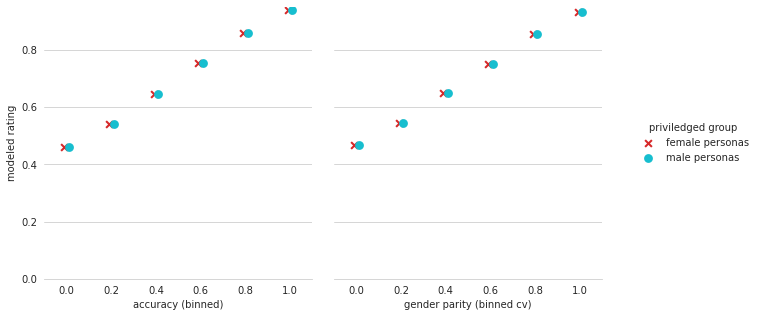

In [12]:
theoretical_pointplots(df_syn)

### Model that closely fits the data

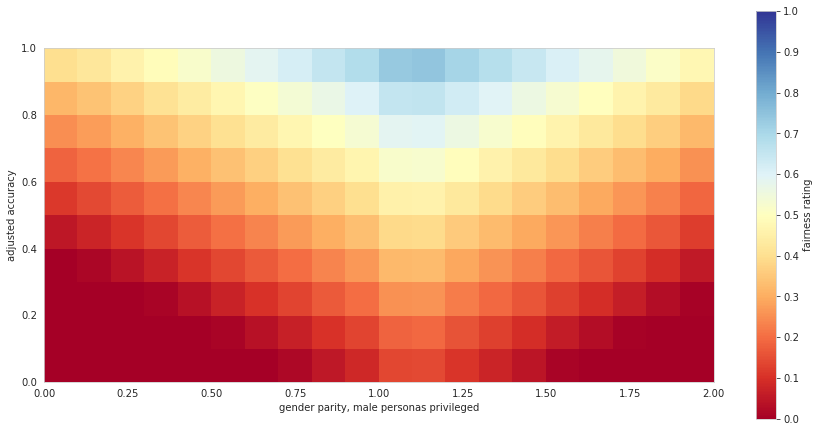

In [13]:
model_sel_ratings(df_syn,
                  abs_cv = 0.5,
                  female_boost = 0.09,
                  overall_discount = .2)
print_discrete_heatmap(data=df_syn, x='question.gender_cv', y='question.adj_accuracy', z='modeled rating',
                       xlabel="gender parity, male personas privileged",
                       ylabel="adjusted accuracy")

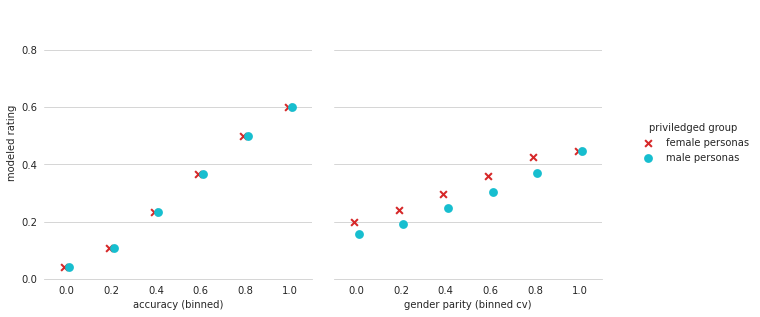

In [14]:
theoretical_pointplots(df_syn)

# Selection Model for All Participants

In [15]:
model_sel_ratings(df_sel,
                  abs_cv = 0.5,
                  female_boost = 0.09,
                  overall_discount = .2)
model_sel_ratings(df_syn,
                  abs_cv = 0.5,
                  female_boost = 0.09,
                  overall_discount = .2)

df_sel.head()

,rating,question.adj_accuracy,question.s_adj_accuracy,question.cv,question.abs_cv,question.gender_cv,question.cat_gender_cv,question.cat_inverse_gender_cv,question.cat_adj_accuracy,question.majLabel,user.gender,modeled rating
0,0.89,1.000000,1.000000,1.714286,0.285714,0.285714,0.2,1.8,1.0,female,male,0.492848
1,0.58,0.898551,1.000000,0.600000,0.600000,1.400000,1.4,0.6,0.8,female,male,0.592928
2,0.39,0.862745,0.905812,1.333333,0.666667,1.333333,1.4,0.6,0.8,male,male,0.591230
3,0.25,0.736486,0.729630,0.750000,0.750000,1.250000,1.2,0.8,0.8,female,male,0.533122
4,0.05,0.825911,0.042254,2.000000,0.000000,0.000000,0.0,2.0,0.8,female,male,0.275131


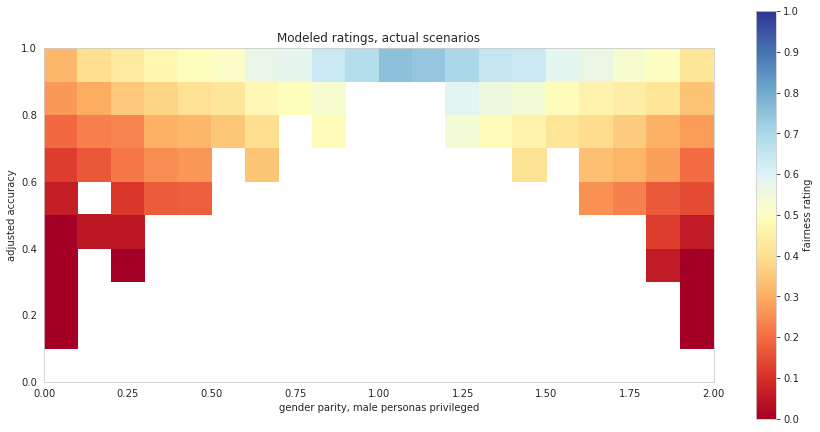

In [16]:
print_discrete_heatmap(data=df_sel, x='question.gender_cv', y='question.adj_accuracy', z='modeled rating',
                       title="Modeled ratings, actual scenarios",
                       xlabel="gender parity, male personas privileged",
                       ylabel="adjusted accuracy")

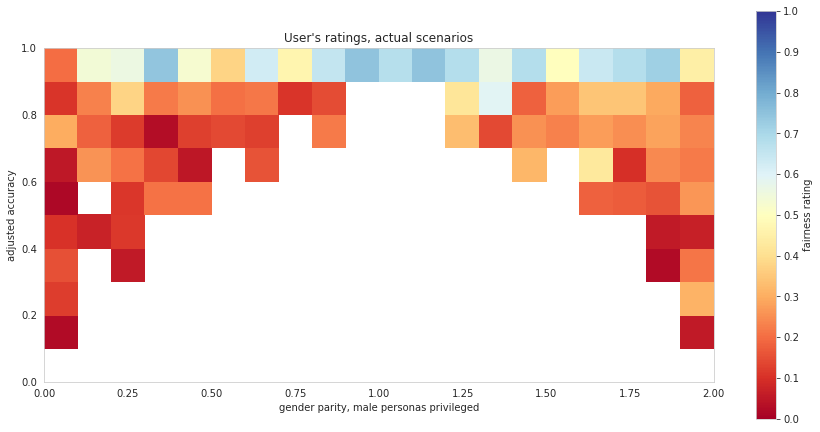

In [17]:
print_discrete_heatmap(data=df_sel, x='question.gender_cv', y='question.adj_accuracy',
                       title="User's ratings, actual scenarios",
                       xlabel="gender parity, male personas privileged",
                       ylabel="adjusted accuracy")

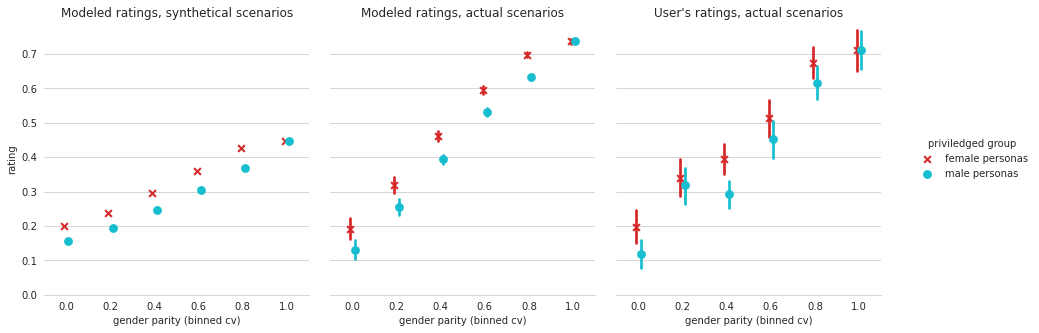

In [18]:
print_pointplots(df_syn, df_sel, gender_filter=None, group_name='User')

**Overall tendency influenced by available questions! (at cv=1 only acc=1 available, accuracy very important)**

# Selection Model for Female Participants

In [19]:
model_sel_ratings(df_sel,
                  abs_cv = 0.5,
                  female_boost = 0.1,
                  overall_discount = .2)
model_sel_ratings(df_syn,
                  abs_cv = 0.5,
                  female_boost = 0.1,
                  overall_discount = .2)

df_sel.head()

,rating,question.adj_accuracy,question.s_adj_accuracy,question.cv,question.abs_cv,question.gender_cv,question.cat_gender_cv,question.cat_inverse_gender_cv,question.cat_adj_accuracy,question.majLabel,user.gender,modeled rating
0,0.89,1.000000,1.000000,1.714286,0.285714,0.285714,0.2,1.8,1.0,female,male,0.488121
1,0.58,0.898551,1.000000,0.600000,0.600000,1.400000,1.4,0.6,0.8,female,male,0.594341
2,0.39,0.862745,0.905812,1.333333,0.666667,1.333333,1.4,0.6,0.8,male,male,0.592654
3,0.25,0.736486,0.729630,0.750000,0.750000,1.250000,1.2,0.8,0.8,female,male,0.534943
4,0.05,0.825911,0.042254,2.000000,0.000000,0.000000,0.0,2.0,0.8,female,male,0.271890


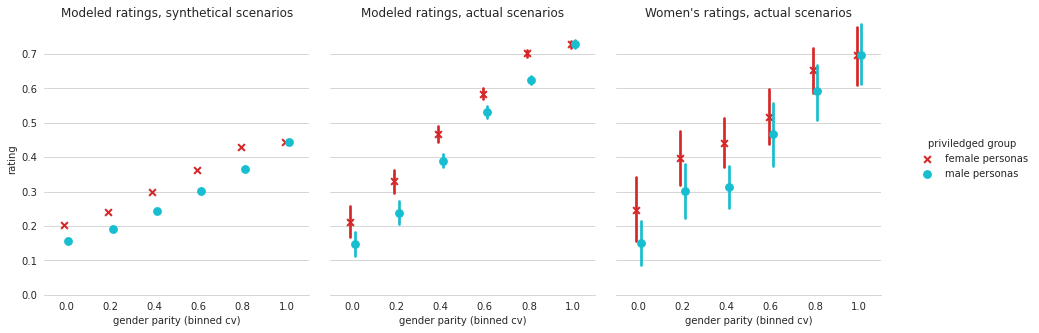

In [20]:
print_pointplots(df_syn, df_sel, gender_filter='female', group_name='Women')

# Selection Model for Male Participants

In [21]:
model_sel_ratings(df_sel,
                  abs_cv = 0.5,
                  female_boost = 0.08,
                  overall_discount = 0.2)
model_sel_ratings(df_syn,
                  abs_cv = 0.2,
                  female_boost = 0.05,
                  overall_discount = 0.2)

df_sel.head()

,rating,question.adj_accuracy,question.s_adj_accuracy,question.cv,question.abs_cv,question.gender_cv,question.cat_gender_cv,question.cat_inverse_gender_cv,question.cat_adj_accuracy,question.majLabel,user.gender,modeled rating
0,0.89,1.000000,1.000000,1.714286,0.285714,0.285714,0.2,1.8,1.0,female,male,0.497640
1,0.58,0.898551,1.000000,0.600000,0.600000,1.400000,1.4,0.6,0.8,female,male,0.591496
2,0.39,0.862745,0.905812,1.333333,0.666667,1.333333,1.4,0.6,0.8,male,male,0.589786
3,0.25,0.736486,0.729630,0.750000,0.750000,1.250000,1.2,0.8,0.8,female,male,0.531276
4,0.05,0.825911,0.042254,2.000000,0.000000,0.000000,0.0,2.0,0.8,female,male,0.278418


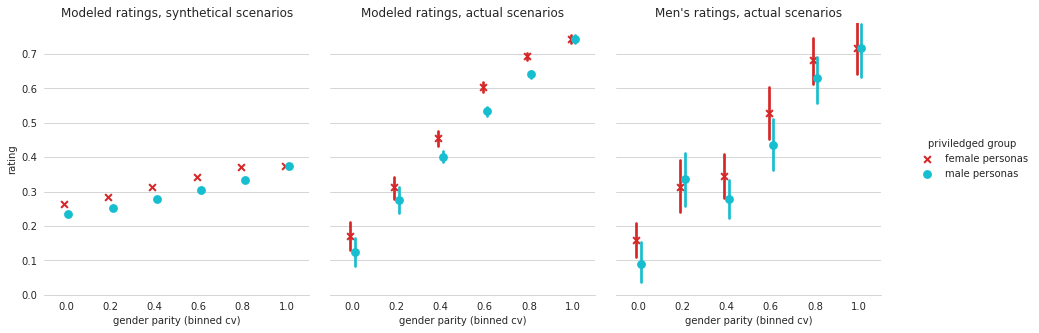

In [22]:
print_pointplots(df_syn, df_sel, gender_filter='male', group_name='Men')

# Ranking Model for All Participants

In [23]:
def model_ran_ratings(df,
                      abs_rND = 0,
                      ordering_utility = 1,
                      minority_prop_boost = 0,
                      minority_boost = 0,
                      female_prop_boost = 0,
                      female_boost = 0,
                      overall_discount = 0):
    
    # add the modeled ratings
    df['modeled rating'] = df['question.ordering_utility'] * ordering_utility \
                               + df['question.abs_rND'] * abs_rND \
    # add boost to unpriviledged groups
    df.loc[df['question.new_rND'] >= 1, 'modeled rating'] = \
        df['modeled rating'] + df['question.new_rND'] * minority_prop_boost + minority_boost
    df.loc[df['question.gender_rND'] >= 1, 'modeled rating'] = \
        df['modeled rating'] + df['question.gender_rND'] * female_prop_boost + female_boost
    # normalize the modeled ratings
    minimum = np.min(df['modeled rating'])
    maximum = np.max(df['modeled rating'])
    df['modeled rating'] = (df['modeled rating'] - minimum) / (maximum - minimum) - overall_discount
    df.loc[df['modeled rating'] < 0, 'modeled rating'] = 0

    return df

In [24]:
model_ran_ratings(df_ran,
                  abs_rND = 0.1,
                  female_prop_boost = 0.03,
                  overall_discount = .2)
model_ran_ratings(df_syn_ran,
                  abs_rND = 0.1,
                  female_prop_boost = 0.03,
                  overall_discount = .2)

df_ran.head()

,rating,question.ordering_utility,question.sum_of_diff,question.new_rND,question.abs_rND,question.cat_gender_rND,question.cat_inverse_gender_rND,question.cat_ordering_utility,question.gender_rND,question.majLabel,user.gender,modeled rating
10,0.36,0.555556,0.622642,0.523612,0.523612,0.6,1.4,0.6,0.523612,male,male,0.346171
11,0.59,0.594595,0.790000,0.650439,0.650439,0.6,1.4,0.6,0.650439,male,male,0.393811
12,0.45,0.255814,0.494949,0.997906,0.997906,1.0,1.0,0.2,0.997906,male,male,0.113770
13,0.61,0.717391,0.840336,0.546572,0.546572,1.4,0.6,0.8,1.453428,female,male,0.537512
14,0.49,0.617647,0.718750,0.996520,0.996520,1.0,1.0,0.6,0.996520,male,male,0.446921


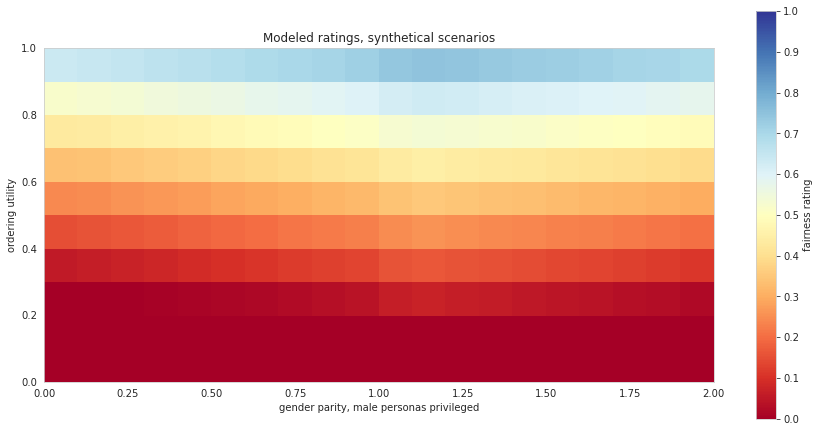

In [25]:
print_discrete_heatmap(data=df_syn_ran, x='question.gender_rND', y='question.ordering_utility', z='modeled rating',
                       title="Modeled ratings, synthetical scenarios",
                       xlabel="gender parity, male personas privileged",
                       ylabel="ordering utility")

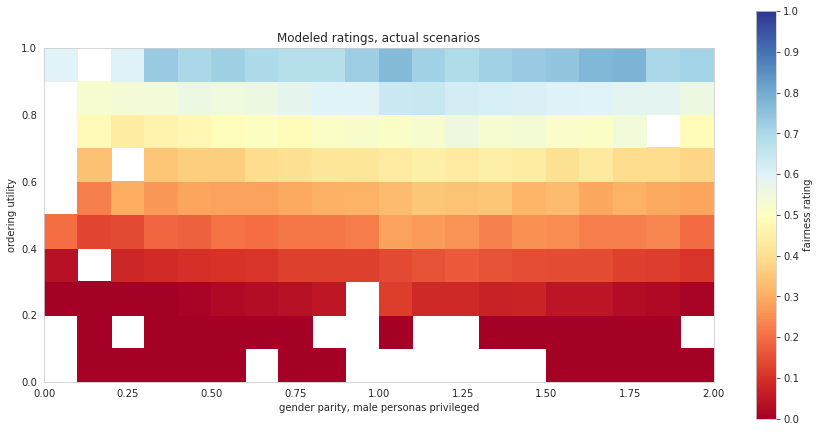

In [26]:
print_discrete_heatmap(data=df_ran, x='question.gender_rND', y='question.ordering_utility', z='modeled rating',
                       title="Modeled ratings, actual scenarios",
                       xlabel="gender parity, male personas privileged",
                       ylabel="ordering utility")

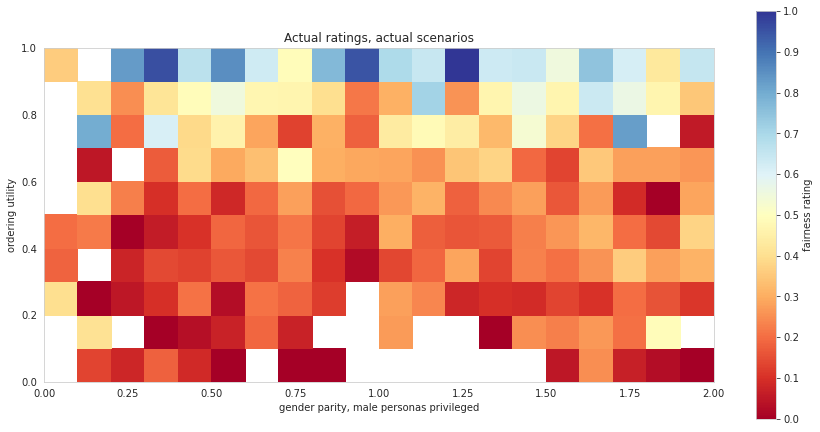

In [27]:
print_discrete_heatmap(data=df_ran, x='question.gender_rND', y='question.ordering_utility', z='rating',
                       title="Actual ratings, actual scenarios",
                       xlabel="gender parity, male personas privileged",
                       ylabel="ordering utility")

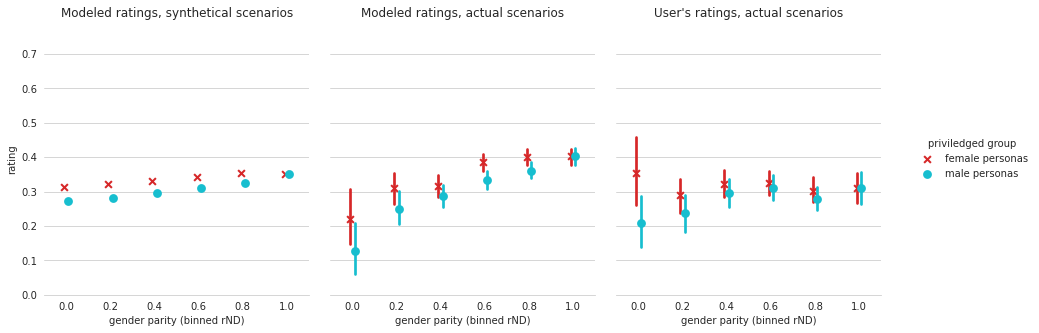

In [28]:
print_pointplots_ran(df_syn_ran, df_ran, gender_filter=None, group_name='User')